In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('marketing_campaign_data_standarization.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.sample(5)

,Income_St,Recency_St,NumWebVisitsMonth_St,Registration_Year_St,Umur_Saat_Registrasi_St,Conversion_Rate_St,Jumlah_Anak_St,Total_Pembelian_St,Total_Campaign_St,Total_Pengeluaran_St,Education_encode_St,Marital_Status_encode_St,klasifikasi_umur_encode_St,Complain,Response
731,1.660959,1.685888,-1.140907,-1.529381,-1.034559,-0.282544,-1.384480,1.732582,-0.414440,2.081531,-0.606231,-0.933147,-0.884676,0,0
806,-1.265826,1.685888,1.137407,-1.529381,-0.948785,-0.282544,-1.384480,0.256142,-0.414440,-0.080027,0.381233,-1.402122,-0.884676,0,0
777,0.102741,-0.108882,1.137407,-0.061626,0.595148,-0.282544,1.357801,1.329917,-0.414440,0.099794,-0.606231,-1.402122,0.810881,0,0
1164,1.145179,-1.593018,-0.685244,-0.061626,2.053307,1.774891,-1.384480,0.390364,1.227347,1.271411,1.368697,-1.402122,0.810881,0,1
1936,0.451600,1.099136,-0.685244,-0.061626,-0.863011,-0.282544,-0.013339,0.524586,-0.414440,-0.074465,-0.606231,0.942753,-0.884676,0,0


In [5]:
df = df.dropna(axis = 0)

## ELBOW METHOD

C:\Users\sanny\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sanny\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sanny\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sanny\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

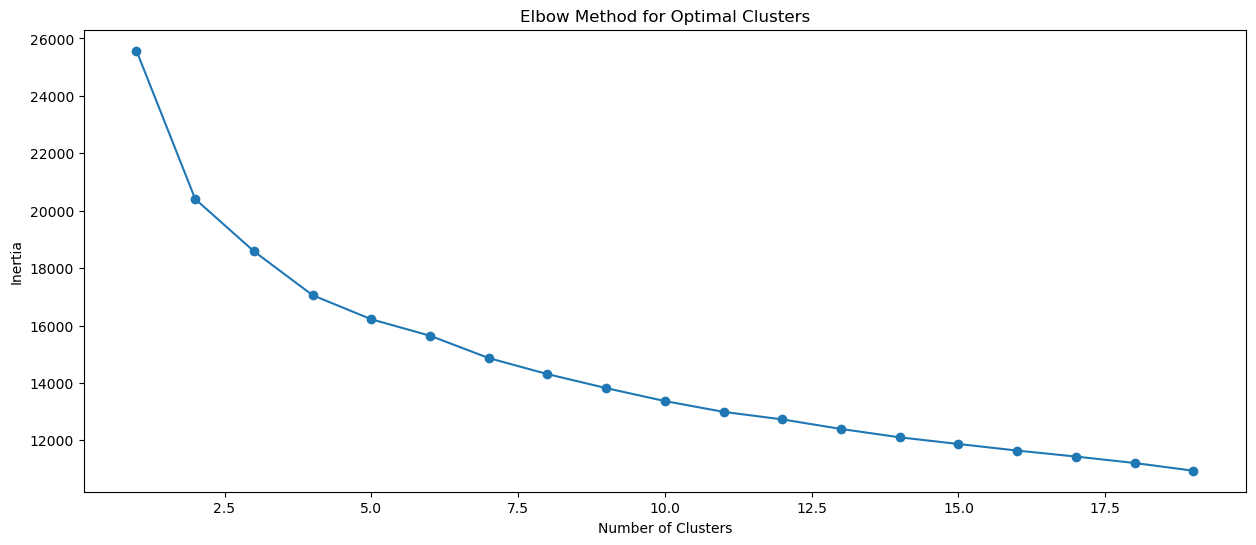

In [6]:
# Tentukan range jumlah cluster yang ingin dicoba
range_clusters = range(1, 20)

# List untuk menyimpan nilai inertia
inertia = []

# Iterasi melalui range jumlah cluster dan hitung inertia
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Plot inertia terhadap jumlah cluster
plt.figure(figsize=(15, 6))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

## RANDOM FOREST

Conversion_Rate_St            0.764532
Total_Campaign_St             0.049916
Recency_St                    0.034505
Total_Pengeluaran_St          0.034366
Income_St                     0.032015
NumWebVisitsMonth_St          0.017253
Umur_Saat_Registrasi_St       0.015797
Total_Pembelian_St            0.013855
Registration_Year_St          0.012649
Marital_Status_encode_St      0.008536
Jumlah_Anak_St                0.008254
Education_encode_St           0.004840
klasifikasi_umur_encode_St    0.002856
Complain                      0.000627
dtype: float64


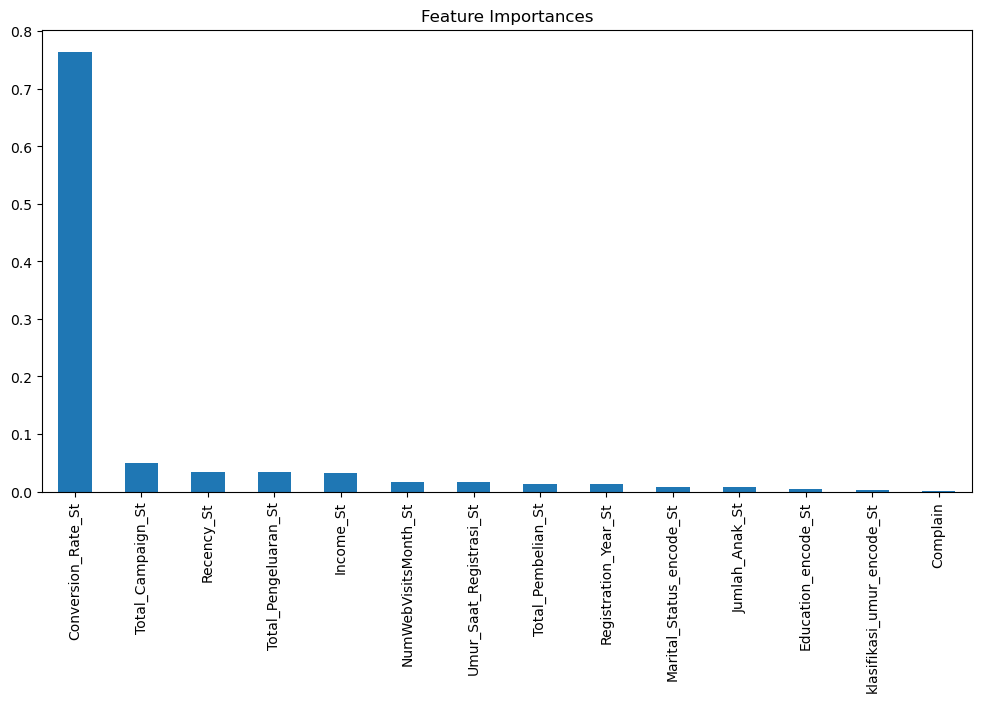

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Memisahkan fitur dan target
X = df.drop('Response', axis=1)
y = df['Response']

# Melatih model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Mendapatkan pentingnya fitur
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances)

# Visualisasi pentingnya fitur
plt.figure(figsize=(12, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.show()

## K-MEANS CLUSTERING

In [8]:
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score

C:\Users\sanny\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.22045080437435152


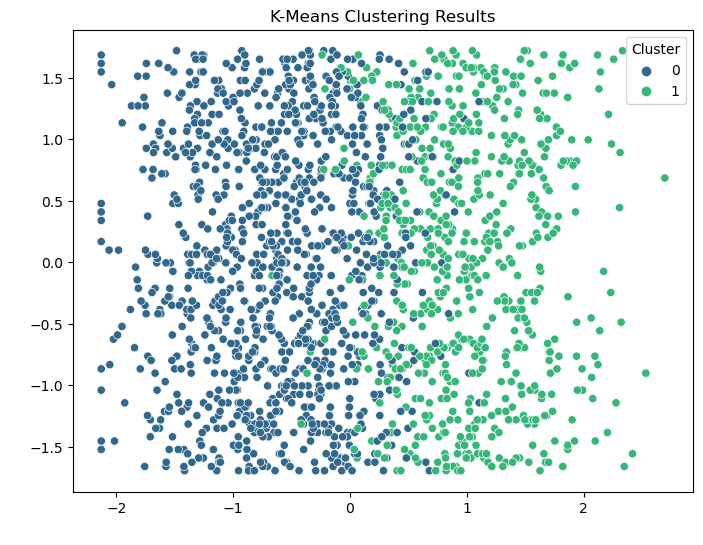

In [9]:
# Menentukan jumlah cluster optimal (misalnya 3 berdasarkan Elbow Method)
optimal_clusters = 2

# Menjalankan K-Means Clustering dengan jumlah cluster optimal
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(df)
df['Cluster'] = kmeans.labels_

# Evaluasi hasil clustering menggunakan Silhouette Score
sil_score = silhouette_score(df, df['Cluster'])
print(f'Silhouette Score: {sil_score}')

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('K-Means Clustering Results')
plt.xlabel(' ')
plt.ylabel(' ')
plt.legend(title='Cluster')
plt.show()

In [10]:
df.sample(3)

,Income_St,Recency_St,NumWebVisitsMonth_St,Registration_Year_St,Umur_Saat_Registrasi_St,Conversion_Rate_St,Jumlah_Anak_St,Total_Pembelian_St,Total_Campaign_St,Total_Pengeluaran_St,Education_encode_St,Marital_Status_encode_St,klasifikasi_umur_encode_St,Complain,Response,Cluster
297,1.050942,-0.385000,-1.140907,-0.061626,0.252052,2.460703,-1.384480,0.524586,-0.41444,0.961822,1.368697,0.473778,0.810881,0,1,1
1691,-1.436526,-0.315970,0.226082,1.406129,-1.034559,-0.282544,-0.013339,-0.683411,-0.41444,-0.864194,0.381233,0.942753,-0.884676,0,0,0
1242,-1.356079,-0.074367,1.137407,-0.061626,0.252052,-0.282544,-1.384480,-1.086077,-0.41444,-0.767795,2.356161,-1.402122,0.810881,0,0,0


In [11]:
# Membandingkan Cluster dengan Target asli
ct = pd.crosstab(df['Response'], df['Cluster'])
print("Crosstab of Target and Cluster:")
print(ct)

Crosstab of Target and Cluster:
Cluster      0    1
Response           
0         1090  599
1          113  148
